In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

# Load data

In [ ]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [3]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


 # Data Profiling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

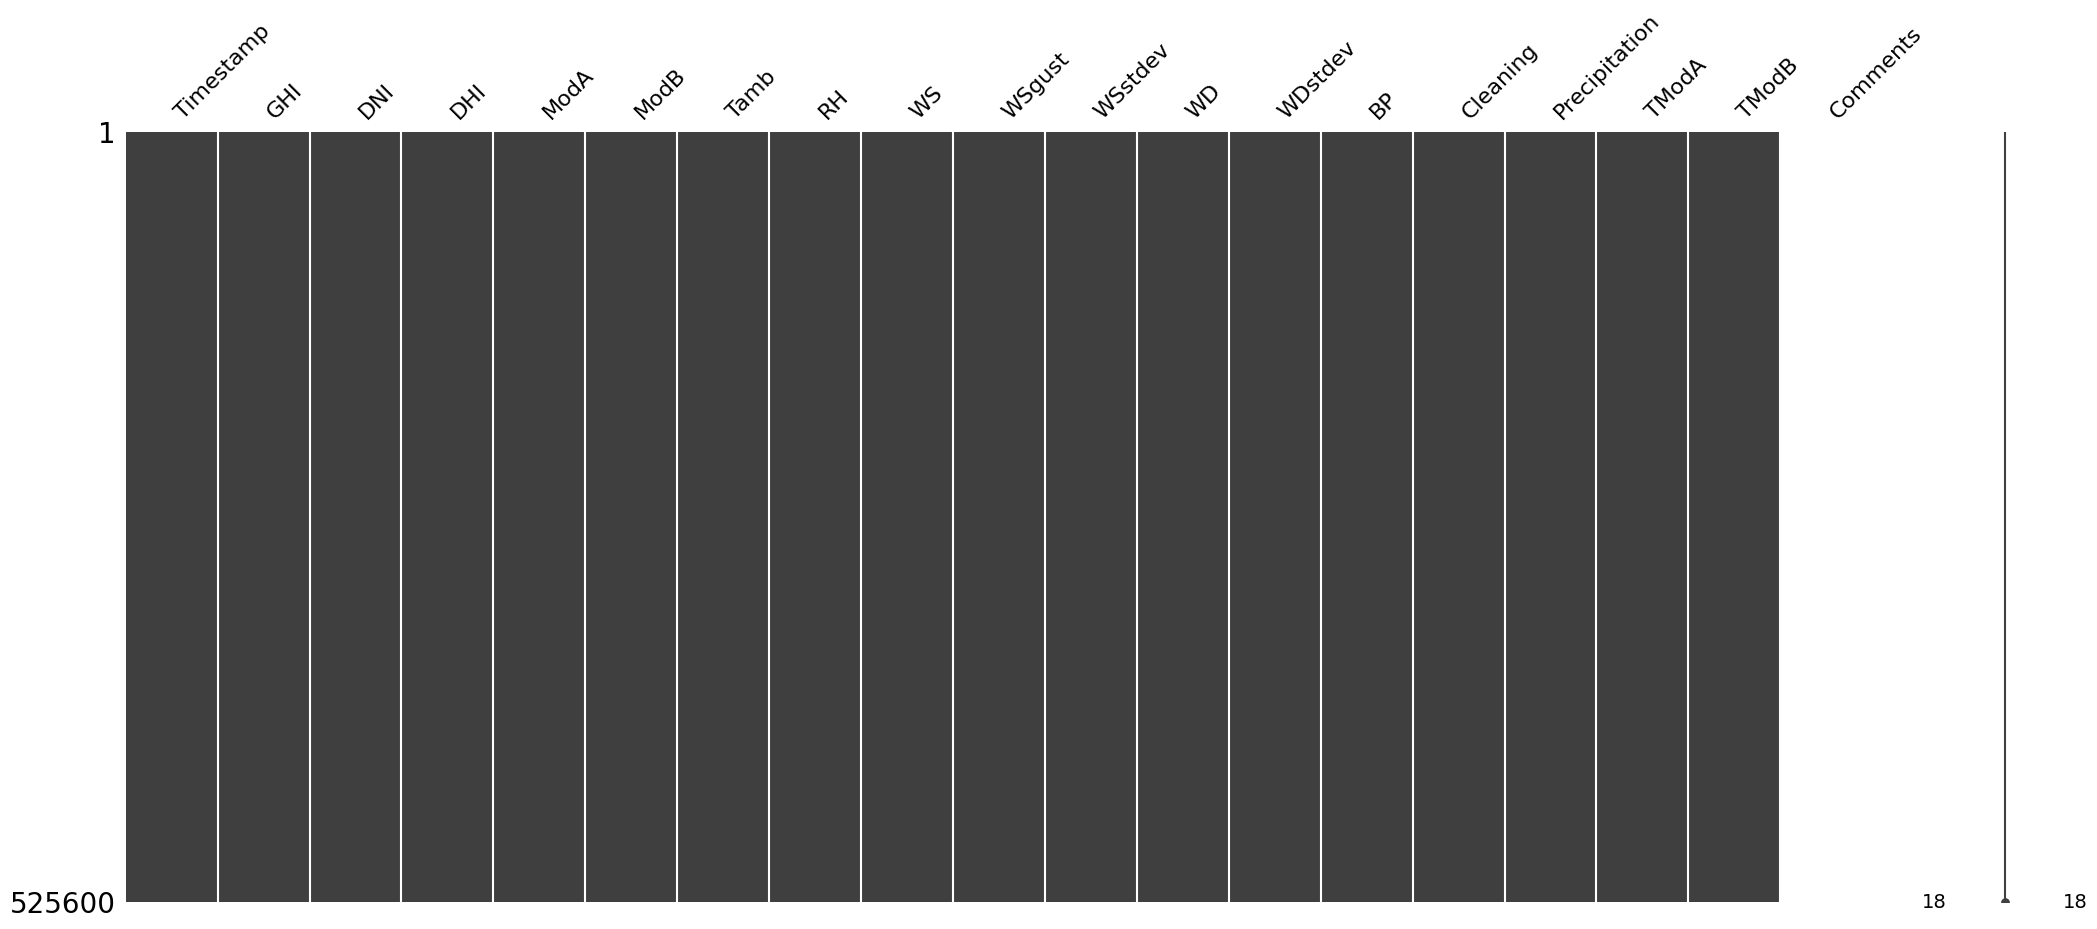

In [ ]:
print(df.info())
print(df.describe())
missing = df.isna().sum()
missing_percent = missing / len(df) * 100
print(missing_percent[missing_percent > 5])
msno.matrix(df)
plt.show()

# DataFrame Analysis

In the above code, I have explore a DataFrame containing 525,600 entries and 19 columns. First, I retrieve basic information about the DataFrame using `df.info()`. This function provides an overview of the DataFrame’s structure, including the count of non-null entries for each column and their respective data types. Following that, I generate summary statistics with `df.describe()`, which gives us key insights such as the count, mean, standard deviation, minimum, maximum, and quartiles for numerical columns.

Next, I assess the presence of missing values by calculating the total number of missing entries for each column using `df.isna().sum()`. We then compute the percentage of missing values relative to the total number of entries. By printing out the columns where more than 5% of the values are missing, we can identify potential areas for data cleaning.

To visualize the missing values more intuitively, we use the `msno.matrix(df)` function from the `missingno` library, followed by `plt.show()` to display the matrix. This visual representation allows us to easily see patterns of missing data, which can inform our data preprocessing strategies.

Overall, this analysis provides a comprehensive overview of the DataFrame, highlighting its structure, statistical properties, and issues related to missing data, all of which are crucial for effective data analysis and modeling.

## Missing Values Visualization

The matrix displayed above provides a visual representation of missing values in the DataFrame. Each column corresponds to a feature in the dataset, while the dark and light areas indicate the presence and absence of data, respectively. 

In this matrix, the `Comments` column is entirely missing, as indicated by the absence of any light shading. Other columns show no significant missing data, suggesting that the dataset is largely complete. This visual tool is effective for quickly assessing the quality of the data and identifying columns that may require further attention during preprocessing.

# Outlier Detection and Cleaning

In [ ]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols_to_check].dropna()))
outliers = (z_scores > 3).any(axis=1)
print(f"Found {outliers.sum()} outliers")
for col in cols_to_check:
    df[col] = df[col].fillna(df[col].median())

# Save cleaned data
#df.to_csv('../data/sierraleone_clean.csv', index=False)

Found 16292 outliers



In the above code, I perform an analysis to identify and manage outliers in key numerical columns of the DataFrame. I focus on the following columns: `GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `WS`, and `WSgust`. First, I have calculated the Z-scores for these columns using the `stats.zscore` function. The Z-score measures how many standard deviations a data point is from the mean; I take the absolute value of these scores to evaluate deviations regardless of direction.

Next, I flag any outliers by identifying rows where the Z-score exceeds 3, indicating that the value is significantly different from the rest of the data. In this analysis, I found a total of **16,292 outliers**, which may require further investigation or remediation.

Following the outlier detection, I address any missing values in the specified columns by imputing them with the median of each column. This approach ensures that our dataset retains as much information as possible while mitigating the influence of outliers on the imputation process.

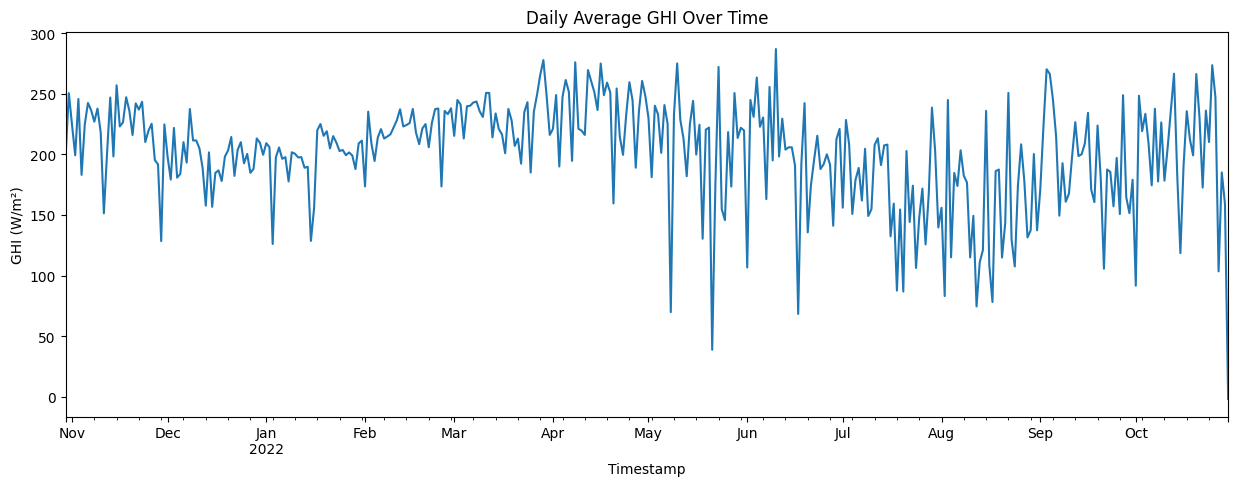

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
daily = df.resample('D').mean()
plt.figure(figsize=(15,5))
daily['GHI'].plot()
plt.title('Daily Average GHI Over Time')
plt.ylabel('GHI (W/m²)')
plt.show()

## Time Series Analysis of Daily Average GHI

In the above segment, I have converted the `Timestamp` column to a datetime format and set it as the DataFrame's index. This allows us to leverage time-based operations. I then resample the data on a daily basis, calculating the daily mean for the `GHI` (Global Horizontal Irradiance) column.

The resulting plot illustrates the daily average GHI values over the course of the year. The x-axis represents the time (from November to October), while the y-axis indicates the GHI measured in watts per square meter (W/m²).

### Interpretation of the Results

The plot displays a fluctuating pattern of daily average GHI values throughout the year. Notably, there are peaks and troughs that suggest variations in solar irradiance, likely influenced by seasonal changes, weather conditions, and geographical factors. 

- **Seasonal Trends**: The data may show higher GHI values during certain months, potentially aligning with sunnier periods, while lower values could represent cloudier or shorter daylight months.
- **Variability**: The presence of significant fluctuations indicates that daily GHI is subject to various influences, such as atmospheric conditions and seasonal changes. 

This analysis provides critical insights into solar energy potential, which can be valuable for planning and optimizing solar energy systems.